# Filmschichtdickenkalibration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.970279271450831, 0.008184025886522802)

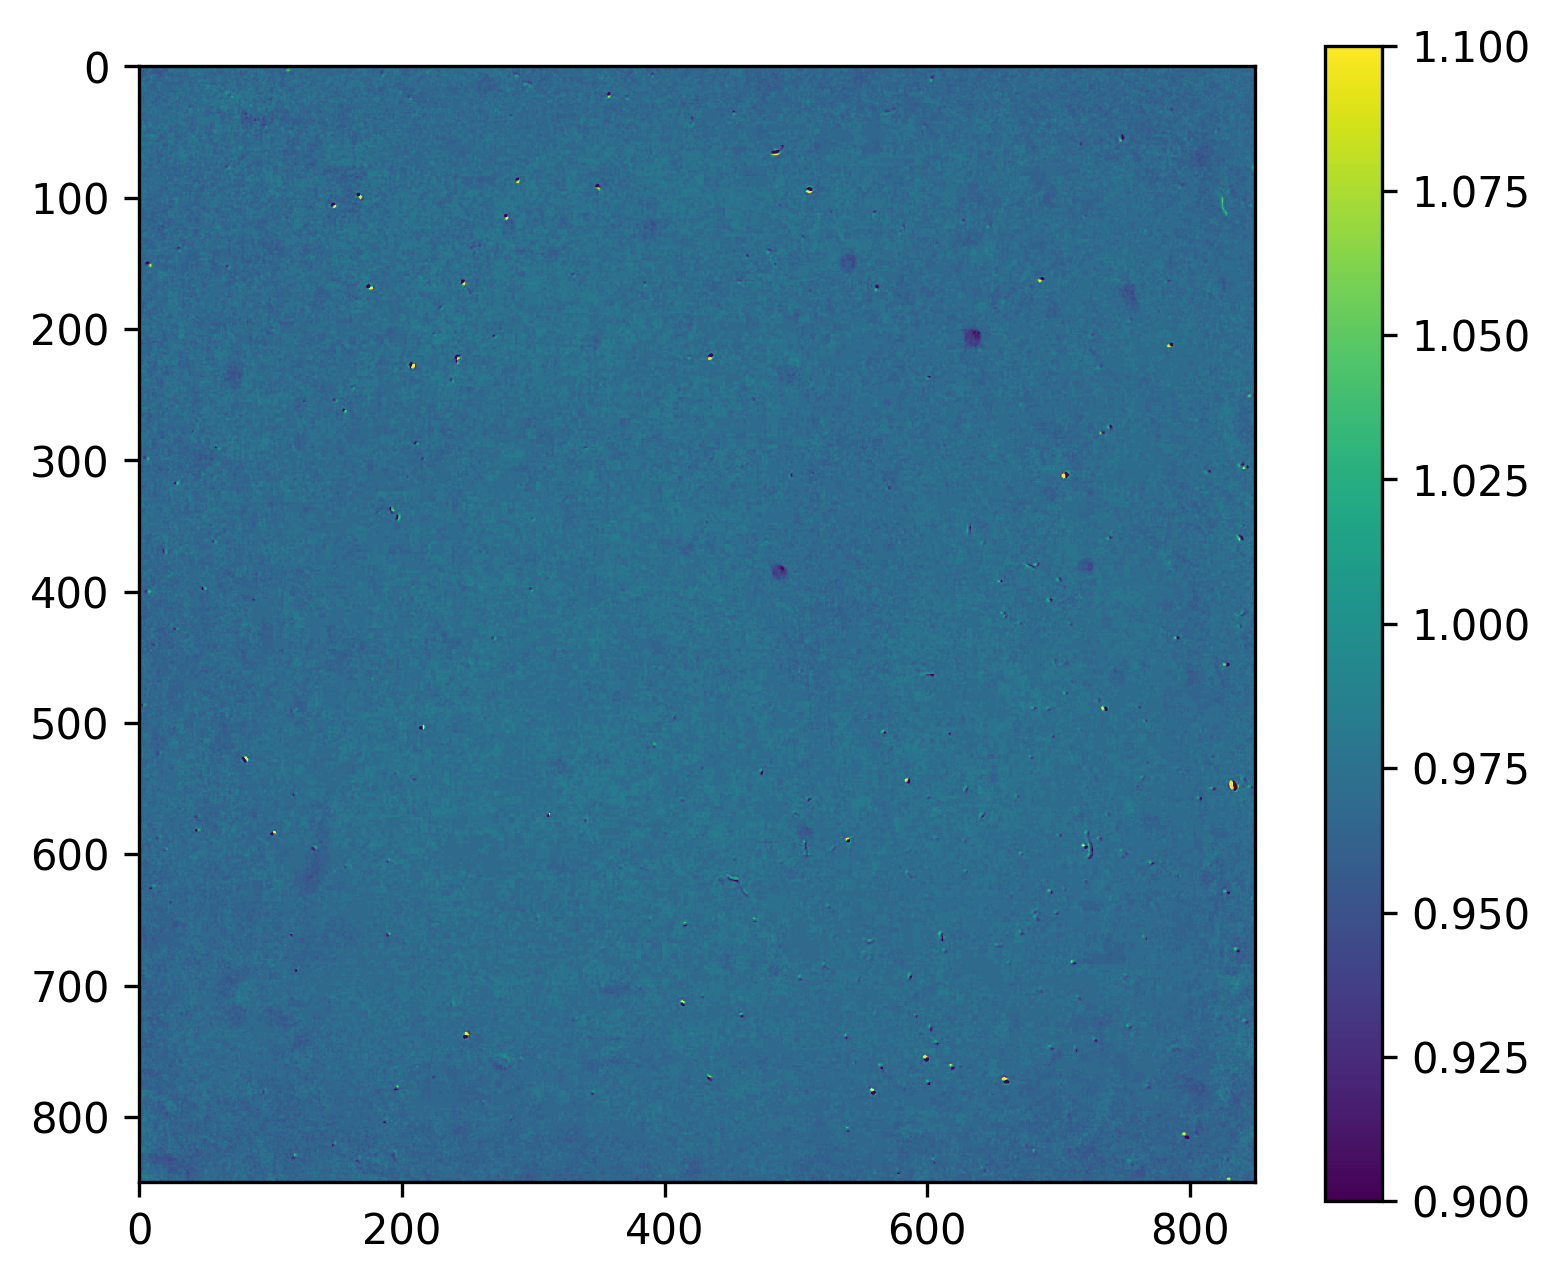

In [3]:
# determine transmission of plate 

background = np.load("./frames/hintergrund_ohnePlatte.npy")
mitPlatte = np.load("./frames/hintergrund_mitPlatte.npy")

fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (6,5))
plot1 = ax.imshow(mitPlatte/background, vmax = 1.1, vmin = 0.90)
fig.colorbar(plot1)

(mitPlatte/background).mean(), (mitPlatte/background).std()

# Transmission of plate (97.0 +- 0.8) %

(0.7157666398374725, 0.011608264062379392)

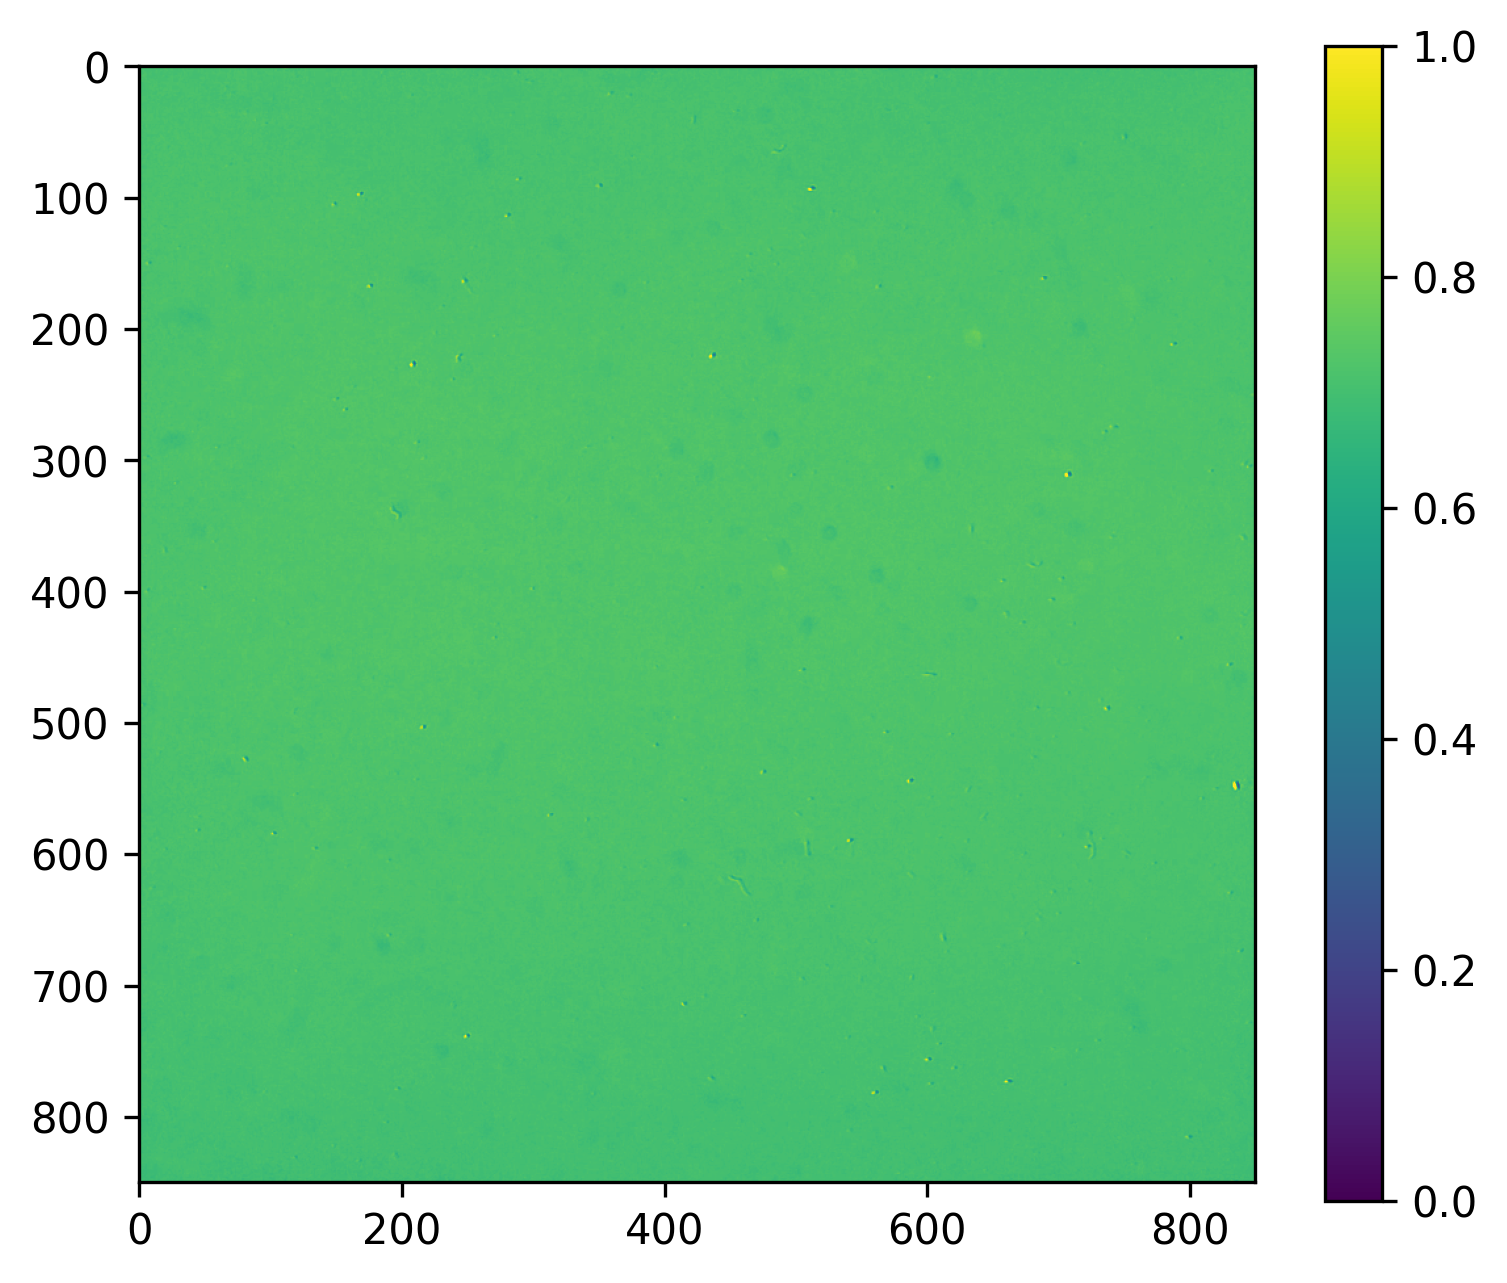

In [4]:
# background division for thickness calibration frames

calib00 = mitPlatte/mitPlatte
calib05 = np.load("./frames/calib05mm.npy")/mitPlatte
calib1 = np.load("./frames/calib1mm.npy")/mitPlatte
calib2 = np.load("./frames/calib2mm.npy")/mitPlatte
calib3 = np.load("./frames/calib3mm.npy")/mitPlatte

image = calib05

fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (6,5))
plot1 = ax.imshow(image, vmax = 1.0, vmin = 0)
fig.colorbar(plot1)

image.mean(), image.std()

In [5]:
# linear fit via least squares
from scipy.stats import linregress 

xArray = np.log(np.array([calib00.mean(), calib05.mean(), calib1.mean(), calib2.mean()]))
yArray = np.array([0., 0.5, 1., 2.])
res = linregress(xArray, yArray)
res

LinregressResult(slope=-2.337984953601605, intercept=-0.11262499936855697, rvalue=-0.9891185591807155, pvalue=0.010881440819284549, stderr=0.24589624694421686, intercept_stderr=0.12925939437897202)

In [6]:
# only slope fit with fixed origin
from scipy.optimize import curve_fit

fitfunc = lambda x, slope: slope*x 

slopeFitResult = curve_fit(fitfunc, xArray, yArray)
slopeFitResult

(array([-2.16581208]), array([[0.01969898]]))

Text(0.5, 0, 'Transmittance in arb. units')

/tmp/ipykernel_12409/3593075796.py:15: RuntimeWarning: divide by zero encountered in log
  secax = ax.secondary_xaxis("top", functions = (lambda x1: np.exp(x1), lambda x2: np.log(x2)))


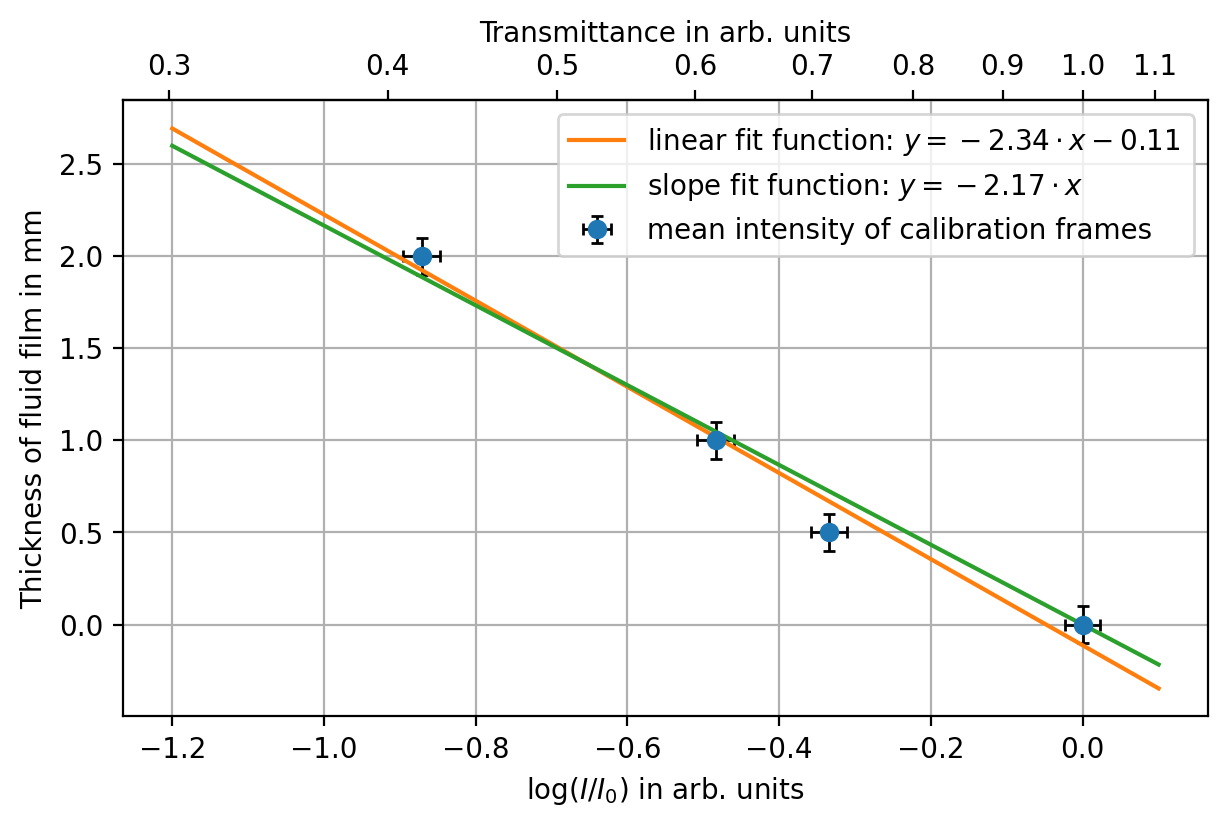

In [23]:
# Plot of Transmission vs Thickness

fig, ax = plt.subplots(1, 1, dpi = 200, figsize = (7, 4))

xRange = np.linspace(-1.2, 0.1, 100)

ax.errorbar(np.log(np.array([calib00.mean(), calib05.mean(), calib1.mean(), calib2.mean()])), [0., 0.5, 1., 2.] , xerr = np.array([calib05.std()*2, calib05.std()*2, calib1.std()*2, calib2.std()*2]), yerr = [0.1,0.1, 0.1, 0.1], marker="o", linewidth=0, ecolor="k", elinewidth=1, capsize=2, label = "mean intensity of calibration frames")
ax.plot(xRange, res.slope*xRange + res.intercept, label = "linear fit function: $y = -2.34 \cdot x - 0.11$ ")
ax.plot(xRange, slopeFitResult[0]*xRange, label = "slope fit function: $y = -2.17 \cdot x $ ")
ax.set_xlabel("$\log(I/I_0)$ in arb. units")
ax.set_ylabel("Thickness of fluid film in mm")
ax.legend()
ax.grid()

secax = ax.secondary_xaxis("top", functions = (lambda x1: np.exp(x1), lambda x2: np.log(x2)))
secax.set_xlabel("Transmittance in arb. units")

In [24]:
fig.savefig("./plots/calibration_curve.png")

/tmp/ipykernel_12409/3593075796.py:15: RuntimeWarning: divide by zero encountered in log
  secax = ax.secondary_xaxis("top", functions = (lambda x1: np.exp(x1), lambda x2: np.log(x2)))


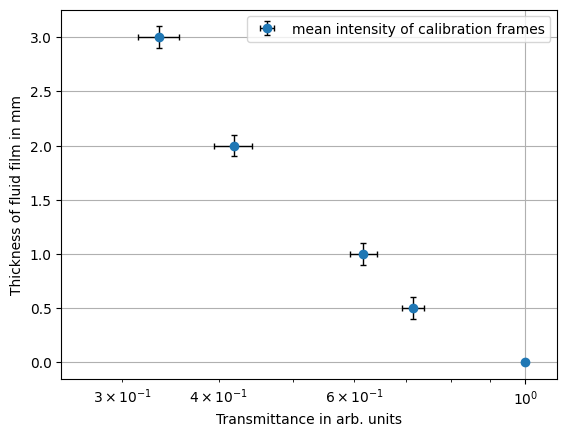

In [52]:
# Plot of Transmission vs Thickness

fig, ax = plt.subplots(1, 1)

xRange = np.linspace(-1.45, -0.1, 100)

ax.errorbar(np.array([calib00.mean(), calib05.mean(), calib1.mean(), calib2.mean(), calib3.mean()]), [0, 0.5, 1., 2., 3.] , xerr = np.array([0,calib05.std()*2, calib1.std()*2, calib2.std()*2, calib3.std()*2]), yerr = [0, 0.1, 0.1, 0.1, 0.1], marker="o", linewidth=0, ecolor="k", elinewidth=1, capsize=2, label = "mean intensity of calibration frames")
ax.set_xlabel("Transmittance in arb. units")
ax.set_ylabel("Thickness of fluid film in mm")
ax.set_xscale("log")
ax.legend()
ax.set_xlim(0.25, 1.1)
ax.grid()